<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df= pd.read_csv('survey_data.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\SAI29\Downloads\survey_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [4]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [5]:
df.describe(include="all")  # Include categorical features

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
count,28108,28108,28033,28107,7273,28108,2.079300e+04,28108,211,3047,28108,23074,28026,28108,28108,27885,27937,27931
unique,25326,7,1220,14377,7010,4319,NaN,11,124,2983,382,137,4841,8,8,6,5,51
top,4/27/2021 11:05:08,25-34,Computing or Tech,Software Engineer,Fundraising,"60,000",NaN,USD,INR,Hourly,United States,California,Boston,11 - 20 years,11 - 20 years,College degree,Woman,White
freq,5,12668,4711,286,20,430,NaN,23410,11,4,9004,2611,772,9630,6542,13536,21389,23235
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.824460e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.336249e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

q2        75
q3         1
q4     20835
q6      7315
q8     27897
q9     25061
q11     5034
q12       82
q15      223
q16      171
q17      177
dtype: int64


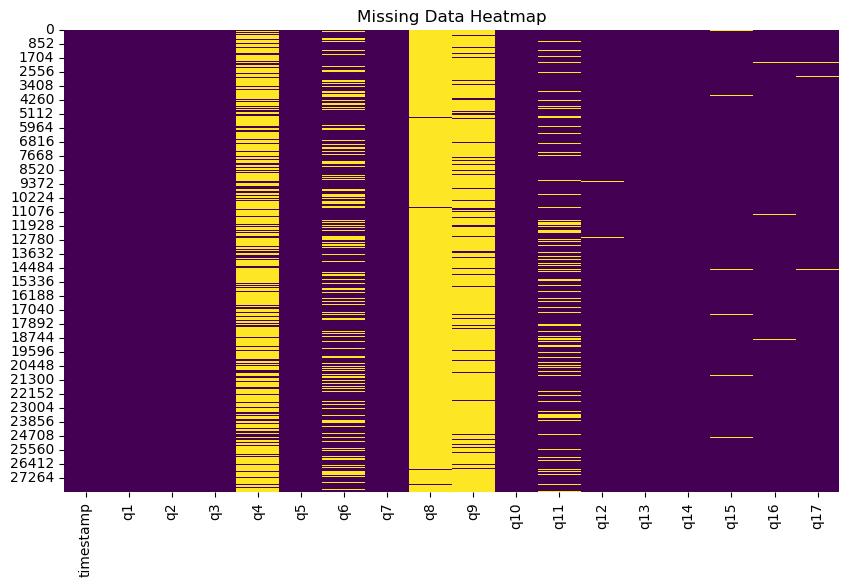

In [7]:
# Visualizing missing data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

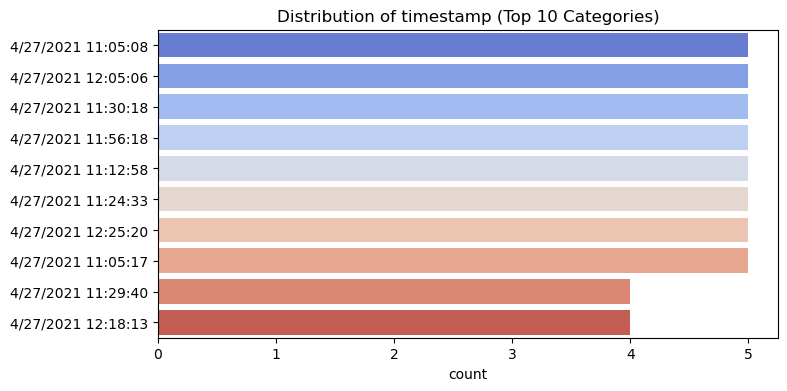

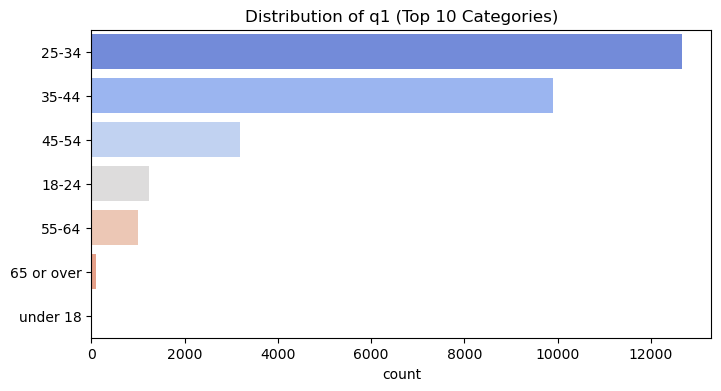

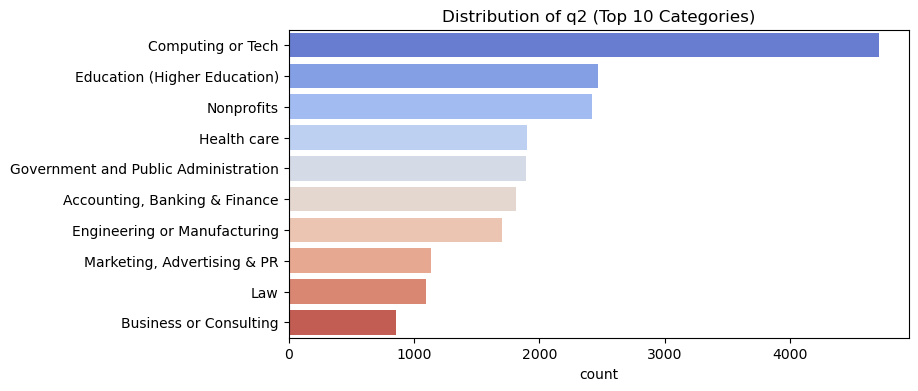

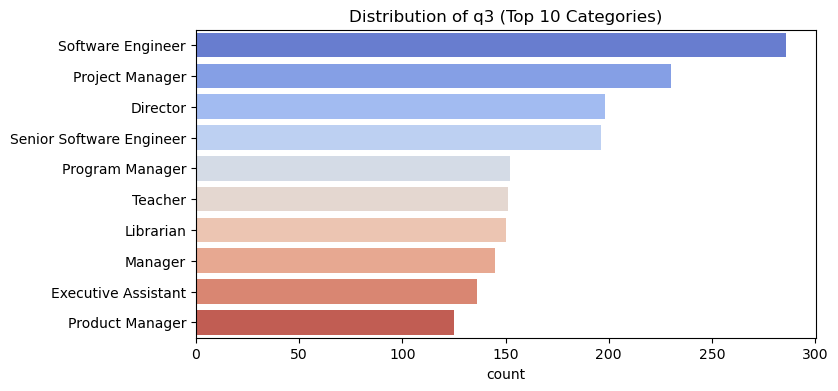

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


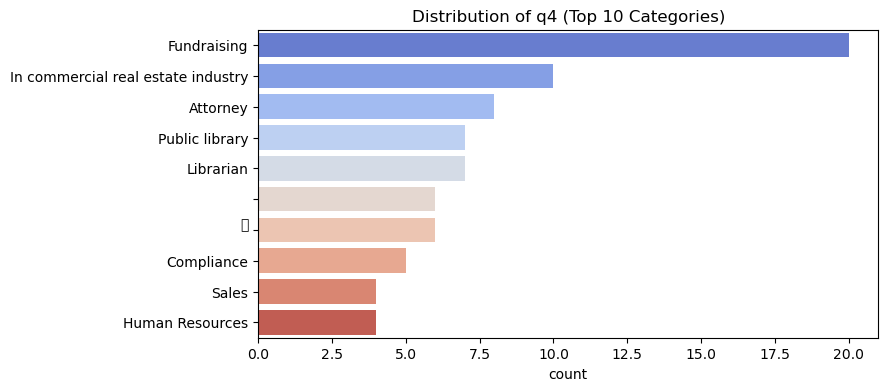

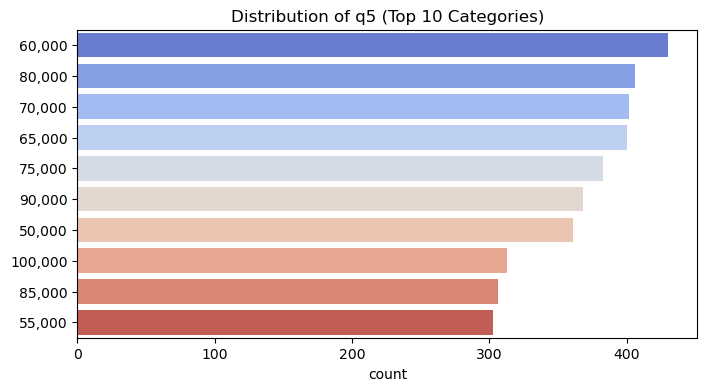

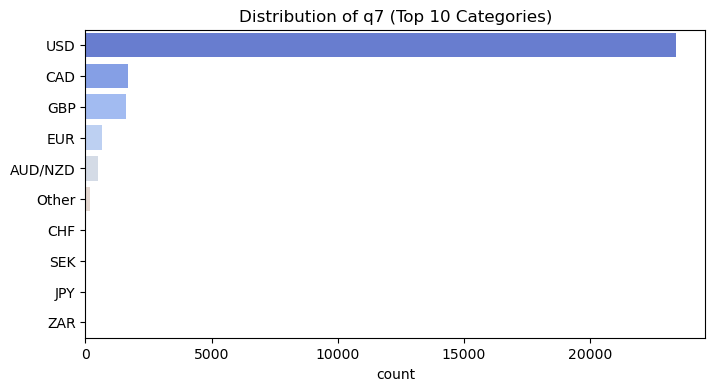

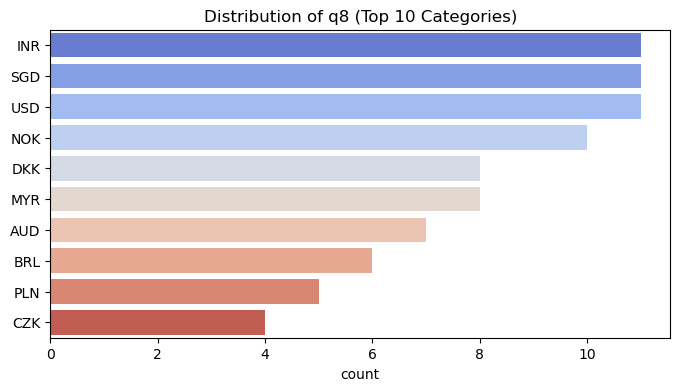

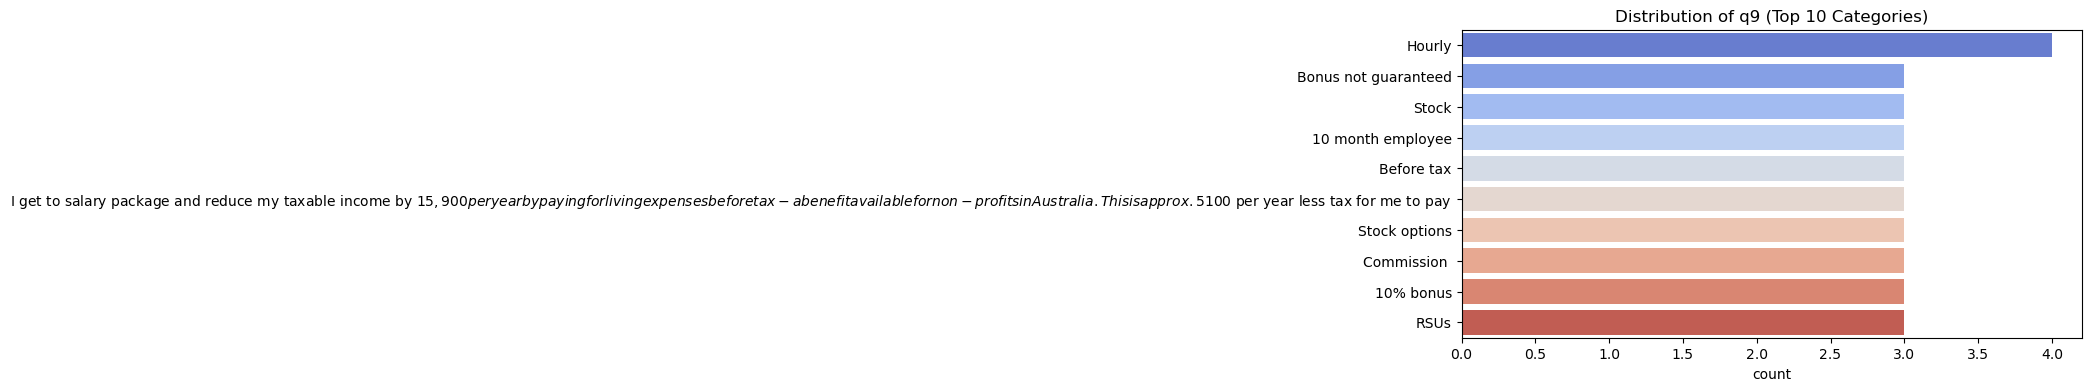

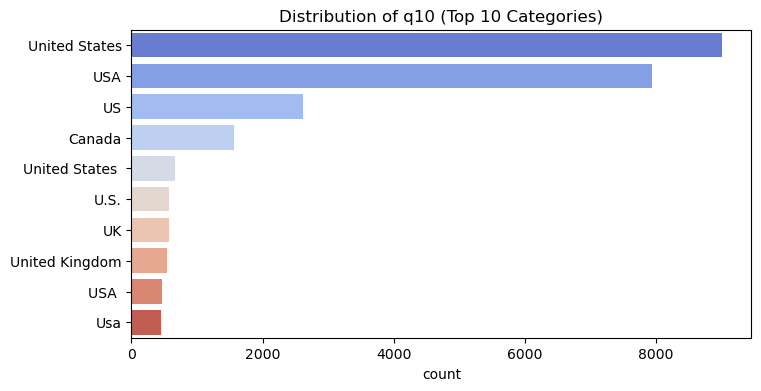

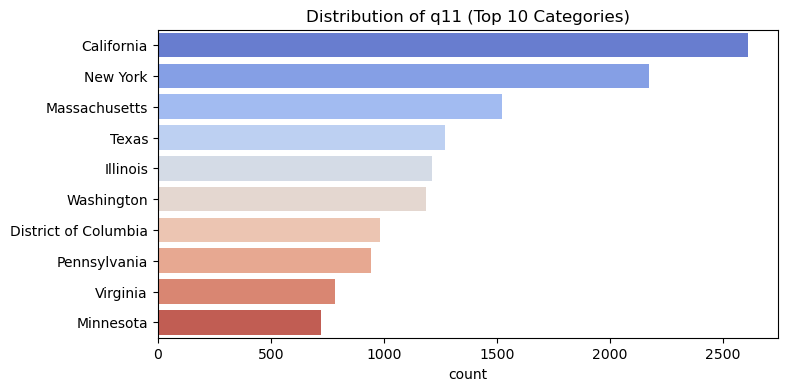

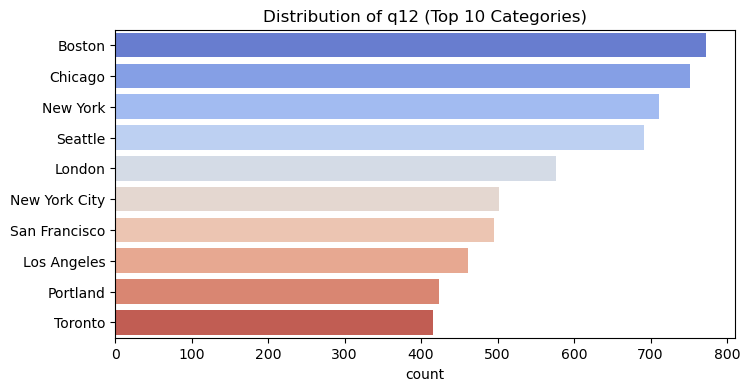

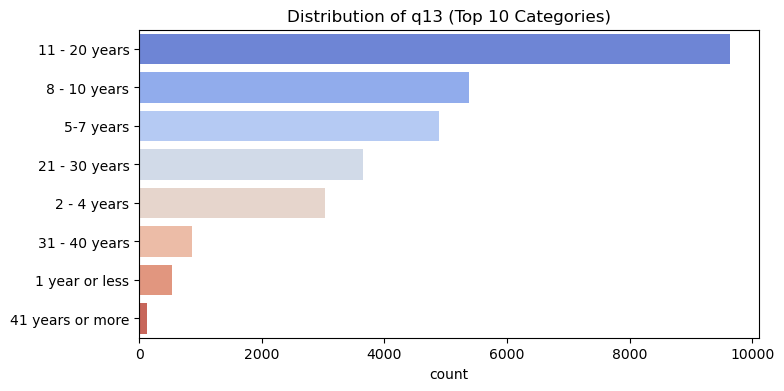

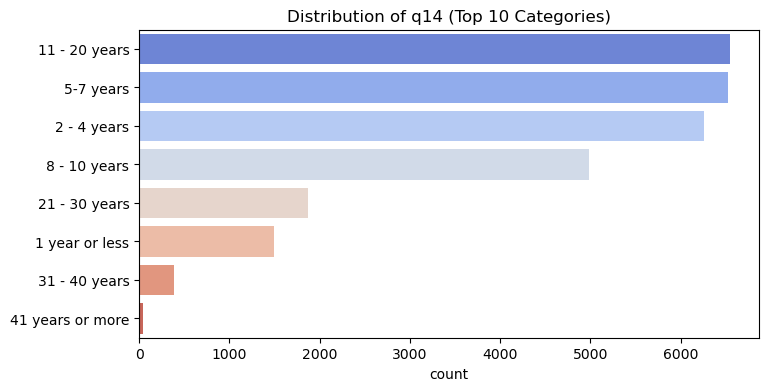

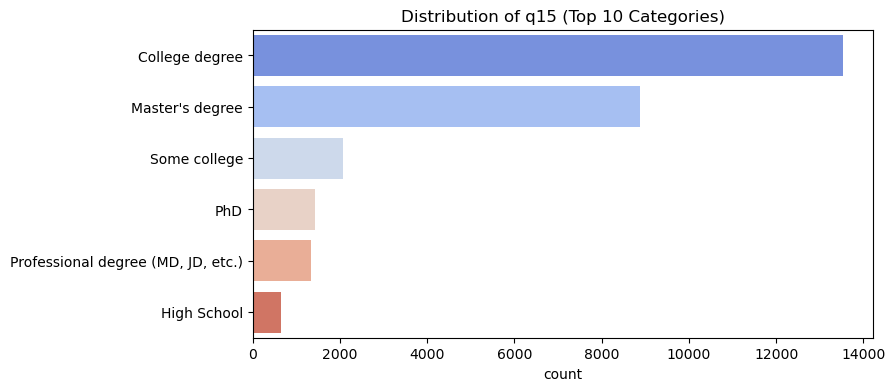

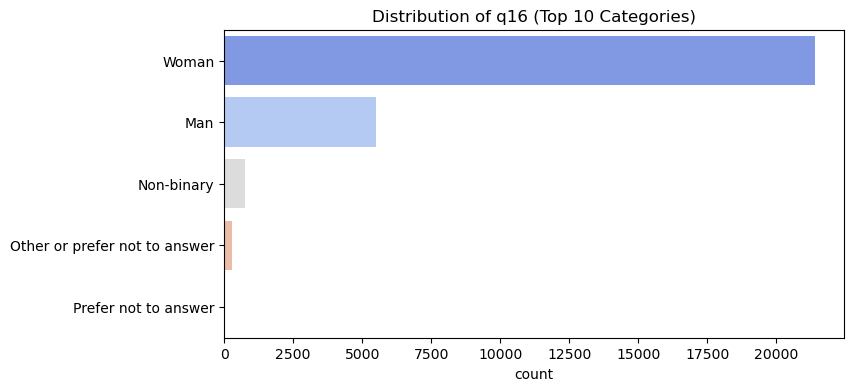

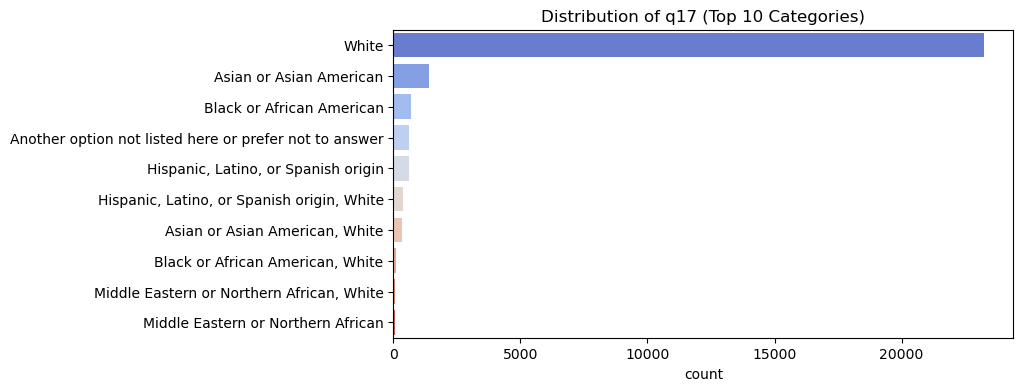

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    top_categories = df[col].value_counts().nlargest(10)  # Select only top 10 categories
    sns.countplot(y=pd.Categorical(df[col], categories=top_categories.index), palette="coolwarm")
    plt.title(f"Distribution of {col} (Top 10 Categories)")
    plt.show()


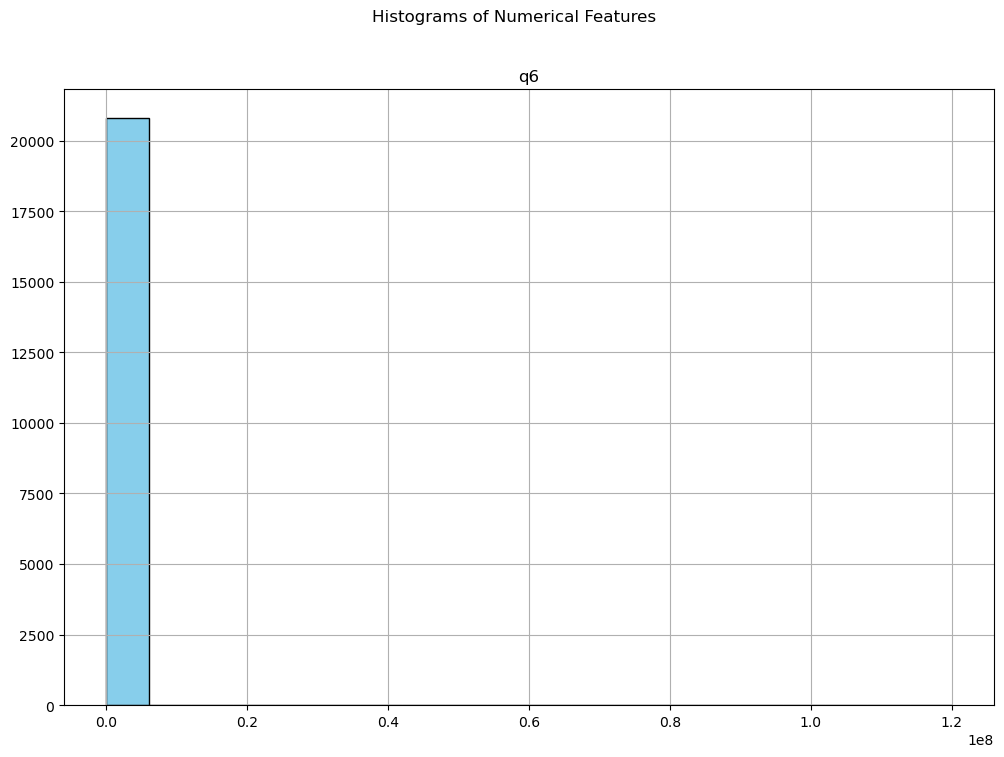

In [8]:
# Checking numerical data distributions
numerical_cols = df.select_dtypes(include=["number"]).columns
df[numerical_cols].hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

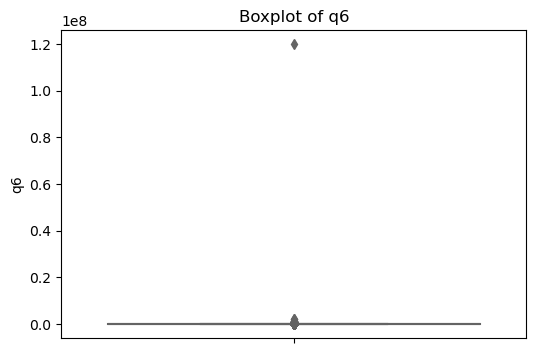

In [9]:
# Checking for outliers using boxplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color="coral")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [16]:
print(df.columns)

Index(['timestamp', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9',
       'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17'],
      dtype='object')


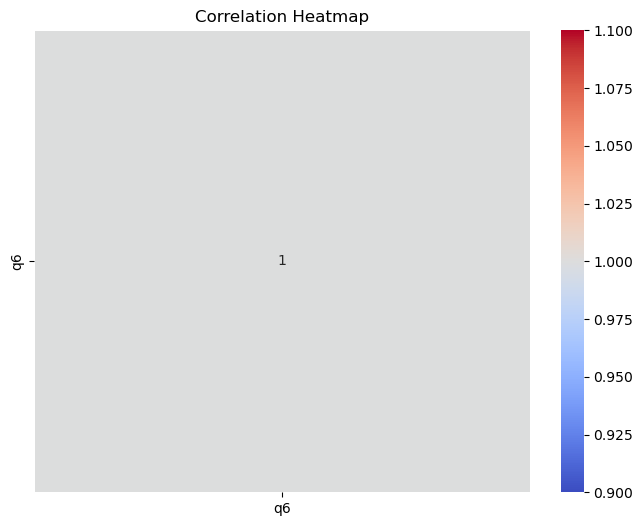

In [18]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

[Add you answer to this markdown cell]

Answer


## State of the Dataset

### 1. **Structure and Data Types**
The dataset contains both categorical and numerical data. The categorical data would be survey responses, and the numerical data could be something such as age or scores. 

### 2. **Missing Values**
The columns contain missing values, though they are not all equal in quantity. We need to choose if we should impute the missing values or remove the rows containing missing values.

### 3. **Issues with Categorical Data**
Some categories occur far more frequently than others, which may influence the outcome. Infrequent categories may have to be combined or eliminated in order to have a balanced analysis.

### 4. **Numerical Data and Outliers**
There are some very high or low numerical values in comparison with others, which may be outliers. We should verify whether they are genuine or errors. If necessary, we can modify or eliminate extreme values.

### 5. **Bias and Data Quality**
Decisions such as imbalanced category handling or dropping missing data can alter the findings. If a group is overrepresented, the observations may not generalize to all individuals. Data cleaning must be diligently done to ensure we don't reach incorrect conclusions.

### **Conclusion**
The data set must be cleaned for use. We need to address missing values, balance categories, and scan for outliers. Cleaning carefully provides fair and accurate outcomes.


#### The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

[Add you answer to this markdown cell]

ANSWER


1. **Handling Missing Values**
   - Detect columns with high missing values.
   - Check if missingness is systematic or random.
   - Remove columns missing too much data (e.g., >50% missing).
   - Apply imputation methods for numeric data (mean, median, mode) where applicable.
- For categorical features, think of imputing missing values with the most common category or a new "Unknown" category.

2. **Outlier Treatment**
   - Detect numerical outliers through IQR methods.
   - Determine whether I can do truncate the extreme values (winsorization) or remove them based on the requirement.
   - For outliers in categorical data, I consolidate rare categories.

3. **Handling Duplicates**
- Look for duplicate rows and remove exact duplicates.
- If needed, examine near-duplicate records for possible merging.

4. **Normalizing Categorical Variables**
   - Standardize formatting (e.g., to lowercase, stripping leading/trailing spaces).
   - Combine similar categories (e.g., "Male" vs. "male").

Following this strategy, I will try to keep as much data as possible while making sure that it is quality and consistent.


#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

In [20]:
# Check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

q8     27897
q9     25061
q4     20835
q6      7315
q11     5034
q15      223
q17      177
q16      171
q12       82
q2        75
q3         1
dtype: int64

In [25]:
# Identify numerical and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with median
for col in numeric_cols:
    df.loc[:, col] = df[col].fillna(df[col].median())

# Impute missing values for categorical columns with mode
for col in categorical_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode().iloc[0])
    
# Confirming missing values are handled
print(df.isnull().sum())

timestamp    0
q1           0
q2           0
q3           0
q5           0
q6           0
q7           0
q10          0
q11          0
q12          0
q13          0
q14          0
q15          0
q16          0
q17          0
dtype: int64


In [27]:
# Drop unnecessary columns safely
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

# Confirming the remaining columns
print("Remaining columns:", df.columns)

Remaining columns: Index(['timestamp', 'q1', 'q2', 'q3', 'q5', 'q6', 'q7', 'q10', 'q11', 'q12',
       'q13', 'q14', 'q15', 'q16', 'q17'],
      dtype='object')


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Q1, Q3, and IQR
Q1 = df["q6"].quantile(0.25)  # 25th percentile
Q3 = df["q6"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -7500.0, Upper Bound: 12500.0


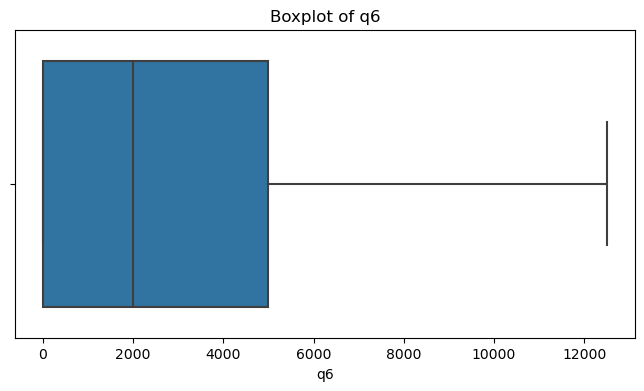

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))  # Optional: Adjust figure size for better visualization
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")  # Add title for clarity
    plt.show()

Number of outliers in q6: 4020


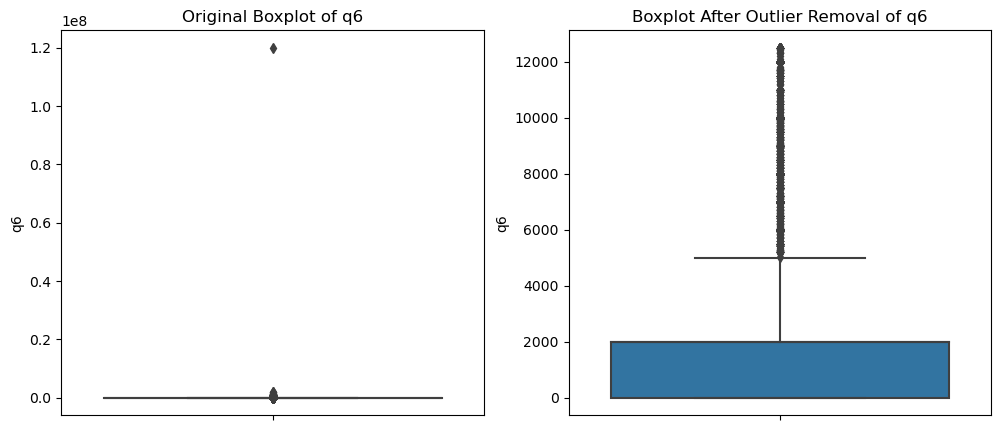

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Define the numerical column to check for outliers
column = 'q6'  

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f"Number of outliers in {column}: {len(outliers)}")

# Winsorization (Cap values instead of removing them)
df_winsorized = df.copy()
df_winsorized[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
df_winsorized[column] = np.where(df[column] > upper_bound, upper_bound, df_winsorized[column])

# Visualizing Before and After
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Data
sns.boxplot(y=df[column], ax=axes[0])
axes[0].set_title(f"Original Boxplot of {column}")

# Cleaned Data
sns.boxplot(y=df_cleaned[column], ax=axes[1])
axes[1].set_title(f"Boxplot After Outlier Removal of {column}")

plt.show()

In [30]:
# Converting categorical data to lowercase and strip spaces
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.lower().str.strip())

# Merge similar categories (if necessary)
df.replace({'Doctor': 'physician', 'Physician': 'physician'}, inplace=True)

# Checking unique values in categorical columns
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in timestamp: ['4/27/2021 11:02:10' '4/27/2021 11:02:22' '4/27/2021 11:02:38' ...
 '1/16/2025 10:00:47' '1/23/2025 19:38:04' '1/27/2025 21:02:19']
Unique values in q1: ['25-34' '45-54' '35-44' '18-24' '65 or over' '55-64' 'under 18']
Unique values in q2: ['education (higher education)' 'computing or tech'
 'accounting, banking & finance' ...
 "i'm currently a student and don't have a job" 'wine & spirits'
 'social networks']
Unique values in q3: ['research and instruction librarian'
 'change & internal communications manager' 'marketing specialist' ...
 'product communication and education specialist'
 'director of content design' 'cmo']
Unique values in q5: ['55,000' '54,600' '34,000' ... '10' '24000000' '279000']
Unique values in q7: ['usd' 'gbp' 'cad' 'eur' 'aud/nzd' 'other' 'chf' 'zar' 'sek' 'hkd' 'jpy']
Unique values in q10: ['united states' 'united kingdom' 'us' 'usa' 'canada' 'uk' 'scotland'
 'u.s.' 'the netherlands' 'australia' 'spain' 'england' 'finland'
 'united

In [32]:
# Save cleaned dataset to a local directory
cleaned_file_path = "cleaned_survey_data.csv"  # Saves in the current working directory
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved at: {cleaned_file_path}")

Cleaned dataset saved at: cleaned_survey_data.csv


In [34]:
# Display final dataset info
print("\nFinal Dataset Info:")
df.info()


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28108 non-null  object 
 3   q3         28108 non-null  object 
 4   q5         28108 non-null  object 
 5   q6         28108 non-null  float64
 6   q7         28108 non-null  object 
 7   q10        28108 non-null  object 
 8   q11        28108 non-null  object 
 9   q12        28108 non-null  object 
 10  q13        28108 non-null  object 
 11  q14        28108 non-null  object 
 12  q15        28108 non-null  object 
 13  q16        28108 non-null  object 
 14  q17        28108 non-null  object 
dtypes: float64(1), object(14)
memory usage: 3.2+ MB


#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

[Add you answer to this markdown cell]

#### Answer

Biggest Problems in the Messy Dataset
The dataset contained a number of issues that had to be corrected before we could use it for analysis. One of the major problems was missing values, which appeared in various columns but at varying proportions. Missing responses to some of the survey questions were much higher compared to others, so we had to determine if we should impute the missing values or drop the incomplete data. A further issue was skewed categorical data, with some response categories occurring far more often than others and possibly distorting results. Outliers in numeric data were also of concern, as very high or low values may represent errors or special cases that could have a disproportionate influence on the model. 

How Cleaning Enhanced Machine Learning Usability
Data cleaning greatly enhanced the quality of the dataset, rendering it more usable for machine learning. By properly dealing with missing values through imputation or removal, the dataset was rendered more complete and organized. Treating outliers prevented models from being affected by extreme values, leading to a more stable training process. Further, merging rare categorical values into more general groups alleviated noise and allowed the model to generalize better. Normalizing categorical variables (e.g., standardizing formatting) provided consistency among entries. Overall, these actions made the dataset more representative and feasible to use for predictive modeling.

Effect of Training on a Dirty Dataset versus a Clean Dataset
If we were to train a model using the dirty dataset, a few things could go wrong. High amounts of missing data may lead the model to overlook useful features or learn misleading patterns. Skewed categorical data may cause biased predictions. The model will prefer the most prominent categories and ignore rare but important ones. Numeric outliers will change the model's learning behavior and render it hypersensitive to outlier values. Training on a cleaned dataset, however, makes the model perform more, be more accurate, and provide improved insights because the data is organized, consistent, and balanced. 

Did cleaning introduce bias?
Although cleaning improves data quality, it entails potential biases as well. For instance, the removal of missing data might disproportionately remove certain groups of people, leading to biased results. Similarly, combining rare categories simplifies analysis but could erase useful differences among different responses. Outlier handling choices also impact bias—removing extreme values might nullify actual cases that would have provided useful information. While unintentional, these choices influence model outcomes, so recording and explaining cleaning choices minimizes bias. 

Conclusion
Cleaning the dataset was a critical task in preparing the dataset for machine learning. While necessary to increase accuracy and usability, the process also had to be performed cautiously to avoid introducing unintentional biases. By striking a balance between data integrity and representativeness, we could make the dataset both clean and fair for analysis.


## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 